<a href="https://colab.research.google.com/github/aviaga/FutureMakers/blob/main/Day%2021%20(7-26)%20-%20Project%202%20on%20Developing%20Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Intro
This is the implementation of part 2 of Day 21's Action Item for SureStart's summer program, 2021.

The goal is to develop a autoencoder model that can do reconstruction and noise removal.

The tutorial for this model development activity can be found [here](https://blog.keras.io/building-autoencoders-in-keras.html).

#Part 1: Autoencoder Based Reconstruction

**Creating the autoencoder structure** 

In [129]:
#Importing libraries for this section
import keras
from keras import layers
from keras import regularizers


In [130]:
#Creating a fully-connected layer for the autoencoder (as encoder and as decoder); note that this is for the Deep Autoencoder
encoding_dim = 32 

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [131]:
#Creating another encoder model
encoder = keras.Model(input_img, encoded)

In [132]:
#Creating another decoder model
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

**Model Configuration**

In [133]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Data Preprocessing and Image Preparation**

In [134]:
#Importing data, but removing labels 
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [135]:
#Pixel data normalization
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


**Model Training**

In [136]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.3827 - val_loss: 0.1909
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1805 - val_loss: 0.1536
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1493 - val_loss: 0.1337
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1318 - val_loss: 0.1218
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1210 - val_loss: 0.1139
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1133 - val_loss: 0.1078
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1077 - val_loss: 0.1035
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1040 - val_loss: 0.1003
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1008 - val_loss: 0.0978
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0985 - val_lo

**Output Visualization**

In [137]:
# Encoding and decoding some images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

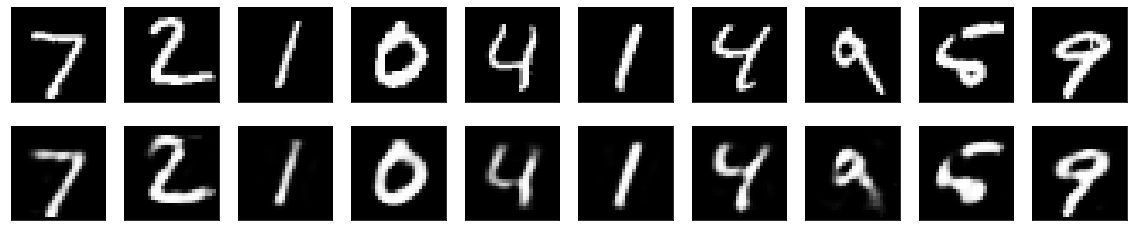

In [138]:
# Plotting some images (bottom is reconstructed, top is original)
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Part 2: Noise Removal

**Creating the autoencoder structure** 

In [139]:
#Importing libraries for this section
import keras
from keras import layers
from keras import regularizers

In [140]:
#Creating a fully-connected layer for the autoencoder (as encoder and as decoder)
encoding_dim = 32 

input_img = keras.Input(shape=(28, 28, 1))

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)

In [141]:
#Creating another encoder model
encoder = keras.Model(input_img, encoded)

**Model Configuration**

In [142]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Data Preprocessing and Image Preparation**

In [143]:
#Importing data, but removing labels 
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [144]:
#Pixel data normalization
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

**Creating Noise and Visualizing**

In [145]:
#Creating noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

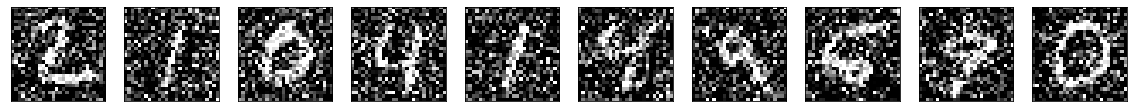

In [146]:
#Visualization of noisy images
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Model Training**

In [147]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 6s 10ms/step - loss: 0.2476 - val_loss: 0.1172
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1158 - val_loss: 0.1092
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1092 - val_loss: 0.1071
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1061 - val_loss: 0.1035
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1040 - val_loss: 0.1021
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1022 - val_loss: 0.1005
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1009 - val_loss: 0.0999
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0998 - val_loss: 0.0986
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0990 - val_loss: 0.0979
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0981 - val_l

**Visualizing Results**

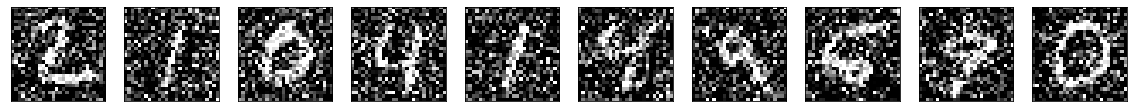

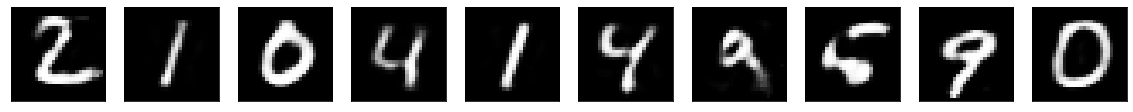

In [148]:
#Note that the top row has the noisy images and the bottom row has the images with the noise removed
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()